In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
fetch_california_housing

<function sklearn.datasets._california_housing.fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False, n_retries=3, delay=1.0)>

In [3]:
from sklearn.model_selection import train_test_split

In [8]:
data = fetch_california_housing()
X_train0 , X_test , y_train0 , y_test = train_test_split(data["data"] , data["target"])
X_train0.shape

(15480, 8)

In [9]:
X_train , X_val , y_train , y_val = train_test_split(X_train0, y_train0)
X_train.shape

(11610, 8)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_val_s = sc.transform(X_val)
X_test_s = sc.transform(X_test)
X_train_s

array([[-0.81414291, -1.23765363,  0.06101875, ..., -0.07496559,
        -0.88324257,  1.32817126],
       [ 0.21814749,  1.85966128, -0.00673959, ..., -0.116615  ,
         1.00569866, -1.42420186],
       [ 0.83150248,  0.58896798,  0.40306699, ...,  0.01722868,
        -0.71067263,  0.77570577],
       ...,
       [ 0.7152597 ,  0.74780465,  0.13531565, ..., -0.05982265,
        -0.80395368,  0.58159628],
       [-0.39431615, -1.47590862, -0.08526284, ..., -0.01169561,
         1.21558102, -1.21516086],
       [ 1.92582049, -1.07881697,  0.6541441 , ...,  0.01716654,
        -0.9298831 ,  0.95986094]])

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50 , activation="relu"),
    tf.keras.layers.Dense(10 , activation="relu"),
    tf.keras.layers.Dense(1)
])

In [15]:
model.compile(loss = "mean_squared_error" , optimizer = "sgd" , metrics = ["mean_absolute_error"])

In [16]:
history = model.fit(X_train_s , y_train , epochs = 30 ,validation_data = (X_val_s , y_val) )

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.2292 - mean_absolute_error: 0.7812 - val_loss: 0.5368 - val_mean_absolute_error: 0.5322
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4704 - mean_absolute_error: 0.4984 - val_loss: 0.4476 - val_mean_absolute_error: 0.4808
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4153 - mean_absolute_error: 0.4639 - val_loss: 0.4262 - val_mean_absolute_error: 0.4598
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3670 - mean_absolute_error: 0.4386 - val_loss: 0.4205 - val_mean_absolute_error: 0.4524
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3822 - mean_absolute_error: 0.4424 - val_loss: 0.4008 - val_mean_absolute_error: 0.4538
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3731 - mean_absolute_error: 0.4315 - val_loss: 0.3879 - val_mean_absolute_error: 0.4370
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3541 - mean_absolute_error: 0.4249 - v

In [17]:
history.history

{'loss': [0.8057857751846313,
  0.4434112012386322,
  0.3982882797718048,
  0.3822218179702759,
  0.3715958297252655,
  0.36543717980384827,
  0.359266459941864,
  0.3539530634880066,
  0.3511345684528351,
  0.3474510610103607,
  0.3436078131198883,
  0.3398725986480713,
  0.3372794985771179,
  0.3345893323421478,
  0.3316335678100586,
  0.3294254541397095,
  0.32610777020454407,
  0.32632148265838623,
  0.3227921426296234,
  0.3189902603626251,
  0.3177168369293213,
  0.3158148527145386,
  0.31456997990608215,
  0.3114309310913086,
  0.30964136123657227,
  0.30838051438331604,
  0.30632030963897705,
  0.3052297830581665,
  0.3040708601474762,
  0.30272847414016724],
 'mean_absolute_error': [0.6254456043243408,
  0.48312869668006897,
  0.4552532136440277,
  0.44332101941108704,
  0.43548375368118286,
  0.4308742582798004,
  0.427458256483078,
  0.4231114387512207,
  0.4220285415649414,
  0.41946837306022644,
  0.4175681471824646,
  0.41417163610458374,
  0.4129076898097992,
  0.4117500

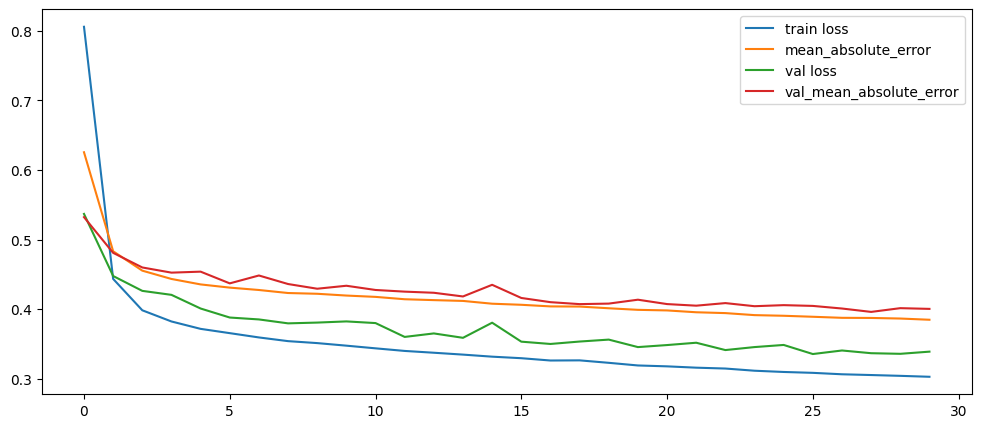

In [18]:
fix , ax = plt.subplots(figsize = (12,5))
ax.plot(history.history["loss"],label="train loss")
ax.plot(history.history["mean_absolute_error"],label="mean_absolute_error")
ax.plot(history.history["val_loss"],label="val loss")
ax.plot(history.history["val_mean_absolute_error"],label="val_mean_absolute_error")
ax.legend()

In [19]:
model.evaluate(X_test_s , y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3521 - mean_absolute_error: 0.4042


[0.3344036042690277, 0.3994946777820587]